In [50]:
%matplotlib inline
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
np.random.seed(123)

In [3]:
mu_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20).T
assert class1_sample.shape == (3,20), "The matrix has not the dimensions 3x20"

mu_vec2 = np.array([1,1,1])
cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20).T
assert class2_sample.shape == (3,20), "The matrix has not the dimensions 3x20"

In [15]:
class2_sample.shape

(3L, 20L)

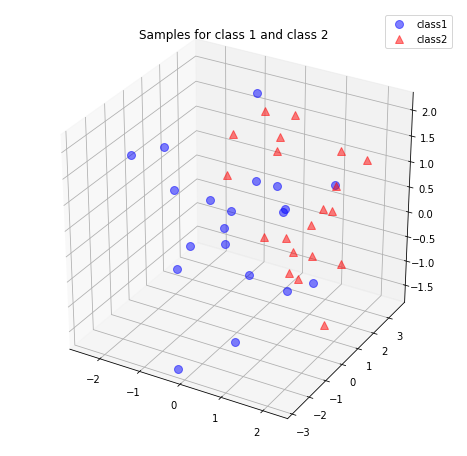

In [6]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['legend.fontsize'] = 10   
ax.plot(class1_sample[0,:], class1_sample[1,:], class1_sample[2,:], 'o'
        , markersize=8, color='blue', alpha=0.5, label='class1')
ax.plot(class2_sample[0,:], class2_sample[1,:], class2_sample[2,:], '^'
        , markersize=8, alpha=0.5, color='red', label='class2')

plt.title('Samples for class 1 and class 2')
ax.legend(loc='upper right')

plt.show()

In [25]:
all_samples = np.concatenate((class1_sample, class2_sample), axis=1)
assert all_samples.shape == (3,40), "The matrix has not the dimensions 3x40"

In [26]:
mean_x = np.mean(all_samples[0,:])
mean_y = np.mean(all_samples[1,:])
mean_z = np.mean(all_samples[2,:])

mean_vector = np.array([[mean_x],[mean_y],[mean_z]])

print('Mean Vector:\n', mean_vector)

Mean Vector:
 [[ 0.42227489]
 [ 0.73574907]
 [ 0.39040387]]


In [27]:
all_samples-=mean_vector


In [28]:
all_samples

array([[-1.50790549, -1.9285696 , -2.84895413, -1.28901529,  1.06911474,
        -0.85662616,  0.58177901,  1.06845714, -1.67615556, -1.85095559,
        -0.67789426, -1.12215212, -0.41942897, -0.13864756, -0.81317468,
        -0.43410538,  0.55646112, -1.4610631 , -0.39259166,  1.33261129,
        -0.1949836 , -0.74854035,  0.62321519,  0.77724919,  1.73992916,
         1.6174522 , -0.25979161, -0.11114387,  0.26296697, -0.63479802,
         1.72793065,  1.75558705, -0.5068428 ,  0.19854868,  1.28998975,
         0.61186724,  1.00387175,  1.82059466,  1.59046417,  0.24524984],
       [ 0.26159638, -1.31434932, -1.1646617 , -1.41463522, -1.37465107,
         1.47018101, -0.34956267, -1.67158294, -1.37350057, -0.87581779,
        -3.53433817,  0.19171336, -0.04752636, -1.54111559, -0.16194321,
         1.6566162 ,  1.50239427,  1.00796316,  0.3335669 ,  0.75989507,
         1.0591136 ,  1.68154998,  0.03115887,  0.73269005, -0.83295212,
        -0.13911511, -1.34171183,  1.92520342, -0.

In [43]:
scatter_matrix = np.zeros((3,3))
for i in range(all_samples.shape[1]):
    scatter_matrix += (all_samples[:,i].reshape(3,1)).dot((all_samples[:,i].reshape(3,1)).T)
print('Scatter Matrix:\n', scatter_matrix)

Scatter Matrix:
 [[ 55.60258006   6.48293267  -0.30031338]
 [  6.48293267  72.01573076   8.65376765]
 [ -0.30031338   8.65376765  48.96338303]]


In [42]:
scatter_matrix /= all_samples.shape[1]-1
print(scatter_matrix)

[[ 1.42570718  0.16622904 -0.00770034]
 [ 0.16622904  1.8465572   0.22189148]
 [-0.00770034  0.22189148  1.25547136]]


In [31]:
cov_mat = np.cov([all_samples[0,:],all_samples[1,:],all_samples[2,:]])
print('Covariance Matrix:\n', cov_mat)

Covariance Matrix:
 [[ 1.42570718  0.16622904 -0.00770034]
 [ 0.16622904  1.8465572   0.22189148]
 [-0.00770034  0.22189148  1.25547136]]


In [9]:
scatter_matrix = np.zeros((3,3))
for i in range(all_samples.shape[1]):
    scatter_matrix += (all_samples[:,i].reshape(3,1) - mean_vector).dot((all_samples[:,i].reshape(3,1) - mean_vector).T)
print('Scatter Matrix:\n', scatter_matrix)

Scatter Matrix:
 [[ 55.60258006   6.48293267  -0.30031338]
 [  6.48293267  72.01573076   8.65376765]
 [ -0.30031338   8.65376765  48.96338303]]


In [11]:
cov_mat = np.cov([all_samples[0,:],all_samples[1,:],all_samples[2,:]])
print('Covariance Matrix:\n', cov_mat)

Covariance Matrix:
 [[ 1.42570718  0.16622904 -0.00770034]
 [ 0.16622904  1.8465572   0.22189148]
 [-0.00770034  0.22189148  1.25547136]]


In [44]:
# eigenvectors and eigenvalues for the from the scatter matrix
eig_val_sc, eig_vec_sc = np.linalg.eig(scatter_matrix)

# eigenvectors and eigenvalues for the from the covariance matrix
eig_val_cov, eig_vec_cov = np.linalg.eig(cov_mat)

for i in range(len(eig_val_sc)):
    eigvec_sc = eig_vec_sc[:,i].reshape(1,3).T
    eigvec_cov = eig_vec_cov[:,i].reshape(1,3).T
    assert eigvec_sc.all() == eigvec_cov.all(), 'Eigenvectors are not identical'

    print('Eigenvector {}: \n{}'.format(i+1, eigvec_sc))
    print('Eigenvalue {} from scatter matrix: {}'.format(i+1, eig_val_sc[i]))
    print('Eigenvalue {} from covariance matrix: {}'.format(i+1, eig_val_cov[i]))
    print('Scaling factor: ', eig_val_sc[i]/eig_val_cov[i])
    print(40 * '-')

Eigenvector 1: 
[[ 0.27846954]
 [ 0.91759056]
 [ 0.28369398]]
Eigenvalue 1 from scatter matrix: 76.6586741579
Eigenvalue 1 from covariance matrix: 1.96560702969
Scaling factor:  39.0
----------------------------------------
Eigenvector 2: 
[[ 0.92632683]
 [-0.17856424]
 [-0.33171284]]
Eigenvalue 2 from scatter matrix: 54.4604322443
Eigenvalue 2 from covariance matrix: 1.3964213396
Scaling factor:  39.0
----------------------------------------
Eigenvector 3: 
[[ 0.25371897]
 [-0.35516527]
 [ 0.89971346]]
Eigenvalue 3 from scatter matrix: 45.4625874503
Eigenvalue 3 from covariance matrix: 1.16570737052
Scaling factor:  39.0
----------------------------------------


Populating the interactive namespace from numpy and matplotlib


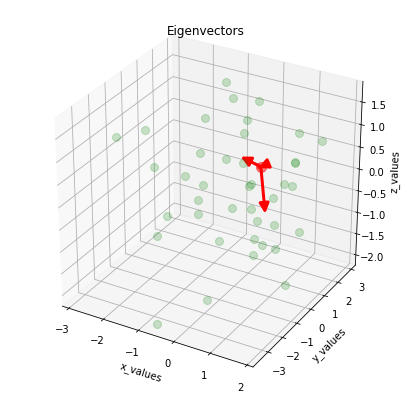

In [45]:
%pylab inline

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch


class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

ax.plot(all_samples[0,:], all_samples[1,:], all_samples[2,:], 'o', markersize=8, color='green', alpha=0.2)
ax.plot([mean_x], [mean_y], [mean_z], 'o', markersize=10, color='red', alpha=0.5)
for v in eig_vec_sc.T:
    a = Arrow3D([mean_x, v[0]], [mean_y, v[1]], [mean_z, v[2]], mutation_scale=20, lw=3, arrowstyle="-|>", color="r")
    ax.add_artist(a)
ax.set_xlabel('x_values')
ax.set_ylabel('y_values')
ax.set_zlabel('z_values')

plt.title('Eigenvectors')

plt.show()

In [46]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_val_sc[i]), eig_vec_sc[:,i]) for i in range(len(eig_val_sc))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
for i in eig_pairs:
    print(i[0])

76.6586741579
54.4604322443
45.4625874503


In [47]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(3,1), eig_pairs[1][1].reshape(3,1)))
print('Matrix W:\n', matrix_w)

Matrix W:
 [[ 0.27846954  0.92632683]
 [ 0.91759056 -0.17856424]
 [ 0.28369398 -0.33171284]]


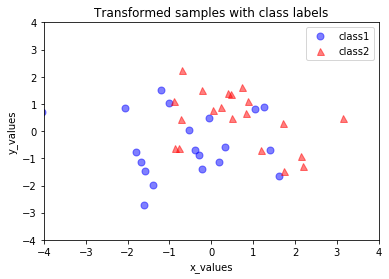

In [48]:
transformed = matrix_w.T.dot(all_samples)
assert transformed.shape == (2,40), "The matrix is not 2x40 dimensional."
plt.plot(transformed[0,0:20], transformed[1,0:20], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(transformed[0,20:40], transformed[1,20:40], '^', markersize=7, color='red', alpha=0.5, label='class2')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.title('Transformed samples with class labels')

plt.show()

PC axes in terms of the measurement axes scaled by the standard deviations:
 [[ 0.39698283  0.71241528  0.57867876]
 [-0.81822017 -0.01095644  0.57480058]
 [ 0.41583698 -0.70167259  0.57856303]]


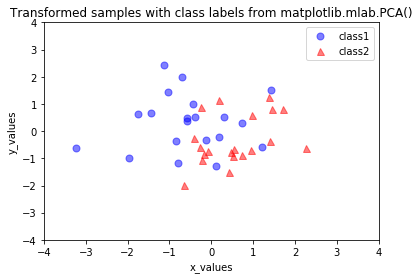

In [49]:
# matplotlib的pca方法，出来的结果不是很一样，因为其会在pca前对方差进行初始化。导致2个方法的方差不同。
from matplotlib.mlab import PCA as mlabPCA

mlab_pca = mlabPCA(all_samples.T)

print('PC axes in terms of the measurement axes scaled by the standard deviations:\n', mlab_pca.Wt)

plt.plot(mlab_pca.Y[0:20,0],mlab_pca.Y[0:20,1], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(mlab_pca.Y[20:40,0], mlab_pca.Y[20:40,1], '^', markersize=7, color='red', alpha=0.5, label='class2')

plt.xlabel('x_values')
plt.ylabel('y_values')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.legend()
plt.title('Transformed samples with class labels from matplotlib.mlab.PCA()')

plt.show()

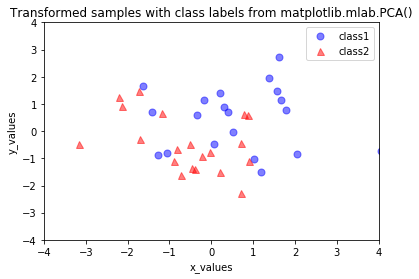

In [51]:
# sklearn的不做归一化的pca看起来和原来的是有中心对称的。这是由于计算特征值向量的时候，可以出现+-号差距，我们只要吧-1乘回去就好了。
from sklearn.decomposition import PCA as sklearnPCA

sklearn_pca = sklearnPCA(n_components=2)
sklearn_transf = sklearn_pca.fit_transform(all_samples.T)

plt.plot(sklearn_transf[0:20,0],sklearn_transf[0:20,1], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(sklearn_transf[20:40,0], sklearn_transf[20:40,1], '^', markersize=7, color='red', alpha=0.5, label='class2')

plt.xlabel('x_values')
plt.ylabel('y_values')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.legend()
plt.title('Transformed samples with class labels from matplotlib.mlab.PCA()')

plt.show()

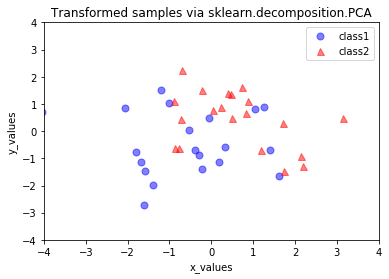

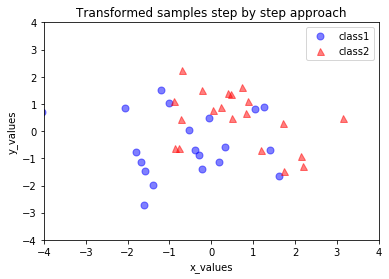

In [52]:
sklearn_transf = sklearn_transf * (-1)

# sklearn.decomposition.PCA
plt.plot(sklearn_transf[0:20,0],sklearn_transf[0:20,1], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(sklearn_transf[20:40,0], sklearn_transf[20:40,1], '^', markersize=7, color='red', alpha=0.5, label='class2')
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.legend()
plt.title('Transformed samples via sklearn.decomposition.PCA')
plt.show()

# step by step PCA
plt.plot(transformed[0,0:20], transformed[1,0:20], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(transformed[0,20:40], transformed[1,20:40], '^', markersize=7, color='red', alpha=0.5, label='class2')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.title('Transformed samples step by step approach')
plt.show()